In [2]:
#Import packages 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('tested.csv')

In [5]:
# intial steps to understand the data

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df.shape # we have 12 columns and 418 rows 

(418, 12)

In [8]:
df.info()
#get some basic information on the dataset...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [13]:
df.isna().sum() 
# get a summary of the missing values for each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
# due to the fact the most of the entries in the Cabin feature are missing we will drop the column all together

In [20]:
df = df.drop('Cabin' , axis = 1)

In [22]:
df.shape # as we can see now we have one less column

(418, 11)

In [35]:
type(df)

pandas.core.frame.DataFrame

In [51]:
df['Age'].isnull().value_counts()

False    332
True      86
Name: Age, dtype: int64

In [81]:
df.dropna(inplace=True) # drop all the missing values from the df

In [53]:
df['Age'].isna().value_counts() 

False    331
Name: Age, dtype: int64

In [54]:
df['Age'] = df['Age'].astype(int) #change into integer

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Survived     331 non-null    int64  
 2   Pclass       331 non-null    int64  
 3   Name         331 non-null    object 
 4   Sex          331 non-null    object 
 5   Age          331 non-null    int64  
 6   SibSp        331 non-null    int64  
 7   Parch        331 non-null    int64  
 8   Ticket       331 non-null    object 
 9   Fare         331 non-null    float64
 10  Embarked     331 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 31.0+ KB


In [59]:
#lets create an age category columns

In [66]:
df.loc[(df.Age >= 0) & (df.Age <= 10), 'AgeCategory'] = 1
df.loc[(df.Age >=11) & (df.Age <= 20), 'AgeCategory'] = 2
df.loc[(df.Age >=21) & (df.Age <= 30), 'AgeCategory'] = 3
df.loc[(df.Age >=31) & (df.Age <= 40), 'AgeCategory'] = 4
df.loc[(df.Age >=41) & (df.Age <= 50), 'AgeCategory'] = 5
df.loc[(df.Age >=51) & (df.Age <= 60), 'AgeCategory'] = 6
df.loc[(df.Age >=61) & (df.Age <= 70), 'AgeCategory'] = 7
df.loc[(df.Age >=71) & (df.Age <= 80), 'AgeCategory'] = 8

In [82]:
df['AgeCategory'].max() #check there is not higher age than what we have 

8

In [69]:
df['AgeCategory'].value_counts()

3.0    131
4.0     56
2.0     47
5.0     45
1.0     22
6.0     20
7.0      9
8.0      1
Name: AgeCategory, dtype: int64

In [70]:
df['AgeCategory'] = df['AgeCategory'].astype(int)

In [71]:
df['AgeCategory'].value_counts()

3    131
4     56
2     47
5     45
1     22
6     20
7      9
8      1
Name: AgeCategory, dtype: int64

<AxesSubplot:title={'center':'Age categories'}>

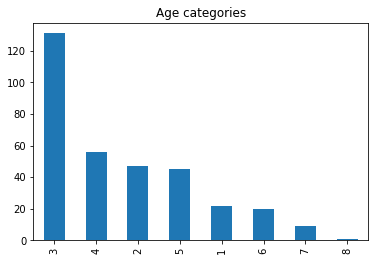

In [83]:
df['AgeCategory'].value_counts().plot.bar(title = "Age categories")
#bar plot to represent the ageCategory column

<AxesSubplot:>

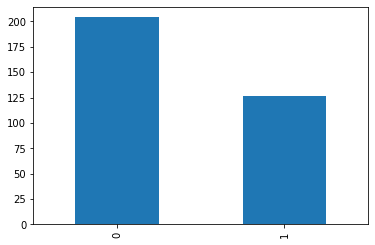

In [87]:
df['Survived'].value_counts().plot.bar()

male      204
female    127
Name: Sex, dtype: int64

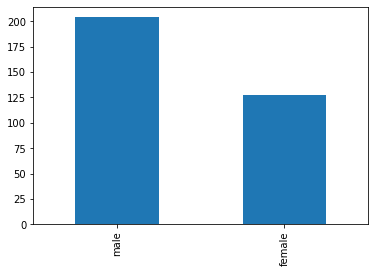

In [90]:
df['Sex'].value_counts().plot.bar()
df['Sex'].unique()
df['Sex'].value_counts()

In [95]:
#change the values of the sex columns from categorical to numerical
df['Sex'].replace(to_replace= 'male', value= 1, inplace= True)
df['Sex'].replace(to_replace = 'female', value = 0, inplace=True)

In [100]:
df['Sex'].value_counts()

1    204
0    127
Name: Sex, dtype: int64

In [102]:
df['Embarked'].value_counts() # C = Cherbourg, S = Southampton, Q = Queenstown

S    227
C     82
Q     22
Name: Embarked, dtype: int64

In [103]:
df['Ticket'].value_counts()

PC 17608              5
113503                4
SOTON/O.Q. 3101315    3
220845                3
347077                3
                     ..
2680                  1
392095                1
350403                1
240276                1
371109                1
Name: Ticket, Length: 284, dtype: int64

In [108]:
df['Pclass'].value_counts()

3    145
1     98
2     88
Name: Pclass, dtype: int64

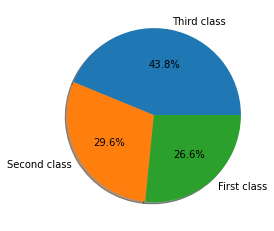

In [131]:
plt.pie(df['Pclass'].value_counts(), labels= ['Third class', 'Second class', 'First class'] , shadow=True, autopct='%1.1f%%');

In [116]:
df.nunique()

PassengerId    331
Survived         2
Pclass           3
Name           331
Sex              2
Age             64
SibSp            7
Parch            7
Ticket         284
Fare           148
Embarked         3
AgeCategory      8
dtype: int64

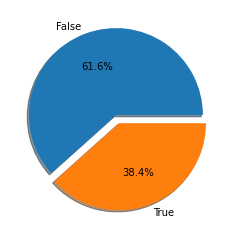

In [128]:
plt.pie(df['Survived'].value_counts(),explode= [0, 0.1],  labels = ['False', 'True'], shadow=True, autopct='%1.1f%%');

In [134]:
# analyse categorical features 

In [135]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex  Survived
0    1           127
1    0           204
Name: Survived, dtype: int64

In [136]:
# where 0 represents females and 1 represents males 

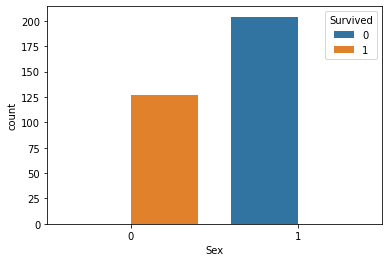

In [139]:
sns.countplot(x = 'Sex', hue = 'Survived', data = df);

In [141]:
pd.crosstab(df.Pclass, df.Survived, margins = True)

Survived,0,1,All
Pclass,,,
1,50,48,98
2,59,29,88
3,95,50,145
All,204,127,331


<AxesSubplot:xlabel='Survived', ylabel='count'>

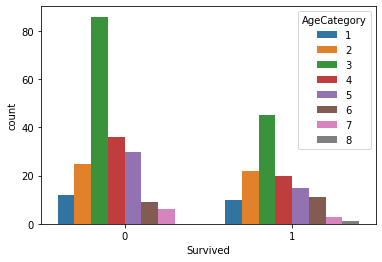

In [153]:
#number of passingers that have survived in relation to their age categpry
sns.countplot(x = 'Survived',hue = 'AgeCategory', data = df)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


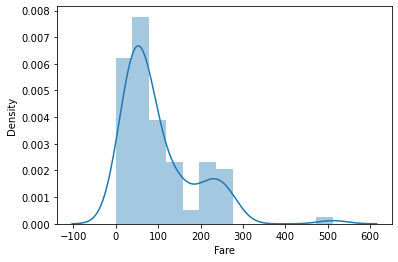

In [158]:
# distribution of fare depending on class of the passenger
sns.distplot(df[df['Pclass'] == 1].Fare);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


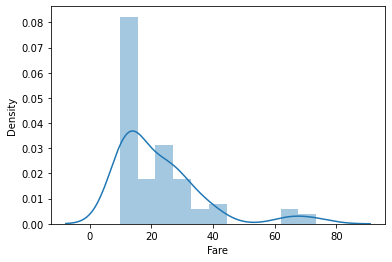

In [156]:
sns.distplot(df[df['Pclass'] == 2].Fare);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


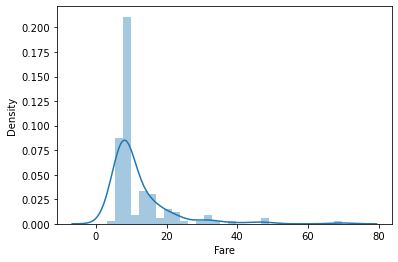

In [157]:
sns.distplot(df[df['Pclass'] == 3].Fare);

In [159]:
#correlation amongs the features 

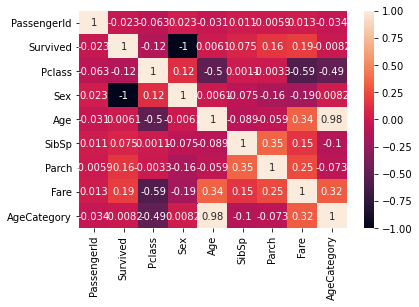

In [161]:
sns.heatmap(df.corr(), annot=True);